In [1]:
load('aca5.mat')
X = transpose(X);
s = transpose(s);

In [2]:
size(X)


ans =

        1747          42



In [3]:
size(s)


ans =

        1747           1



In [4]:
a = [1 2 3; 4 5 6];
a_row_norm = sqrt(sum(a.^2,2));
a_normalized = bsxfun(@rdivide, a, a_row_norm); 
sqrt(sum(a_normalized.^2,2))



ans =

    1.0000
    1.0000



In [5]:
X_truncated = X(1:2:end, :);
s_truncated = s(1:2:end);


In [6]:
X_col_norm = sqrt(sum(X_truncated.^2,1)); 
X_truncated = bsxfun(@rdivide,X_truncated, X_col_norm); 
X_col_norm = reshape(X_col_norm,[],1);
X_truncated(isnan(X_truncated)) = 0;


In [7]:
gamma =1 ;
k = 2;
min_error =  1e9;
min_gamma = 1;
min_k = 2;

errors_laplacian_unnormalized = zeros(100, 49);
errors_laplacian_normalized = zeros(100, 49);
errors_laplacian_rw = zeros(100, 49);

errors_minimum = zeros(100, 49);
errors_minimum_index = zeros(100, 49);

for gamma=1:100    
    for k=2:50
       [idx1, idx2, idx3] = SpectralClustering(gamma, k, X_truncated);
       missclassification_error = Misclassification([idx1 idx2 idx3], s_truncated);
       [min_value, min_index] = min(missclassification_error);
       if min_value < min_error
           min_error = min_value;
           min_gamma = gamma;
           min_k = k;
        end
       errors_laplacian_unnormalized(gamma, k-1) =  missclassification_error(1);
       errors_laplacian_normalized(gamma, k-1) =  missclassification_error(2);
       errors_laplacian_rw(gamma, k-1) =  missclassification_error(3);
       
       errors_minimum(gamma, k-1) = min_value;
       errors_minimum_index(gamma, k-1) = min_index;
    end     
end
    

In [8]:
gammas = 1:100;

In [9]:
dlmwrite('aca5_gammas.txt', gammas);
dlmwrite('aca5_errors_laplacian_unnormalized.txt', errors_laplacian_unnormalized);
dlmwrite('aca5_errors_laplacian_normalized.txt', errors_laplacian_normalized);
dlmwrite('aca5_errors_laplacian_rw.txt', errors_laplacian_rw);
dlmwrite('aca5_errors_minimum.txt', errors_minimum);
dlmwrite('aca5_errors_minimum_index.txt', errors_minimum_index);

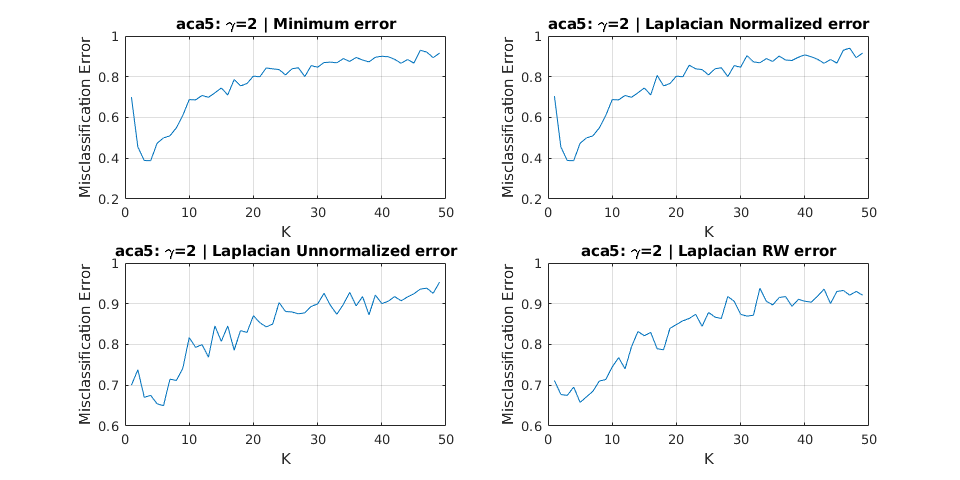

In [10]:
set(gcf, 'PaperPositionMode', 'manual');
set(gcf, 'PaperUnits', 'inches');
set(gcf, 'PaperPosition', [1 1 10 5]);
subplot(2,2,1);
plot(errors_minimum(17,:));
grid on

title('aca5: \gamma=2 | Minimum error');
xlabel('K');
ylabel('Misclassification Error');

subplot(2,2,2);
plot(errors_laplacian_normalized(17,:))
grid on
title('aca5: \gamma=2 | Laplacian Normalized error')
xlabel('K')
ylabel('Misclassification Error')

subplot(2,2,3);
plot(errors_laplacian_unnormalized(17,:))
grid on
title('aca5: \gamma=2 | Laplacian Unnormalized error')
xlabel('K')
ylabel('Misclassification Error')

subplot(2,2,4);

plot(errors_laplacian_rw(17,:))
grid on
title('aca5: \gamma=2 | Laplacian RW error')
xlabel('K')
ylabel('Misclassification Error')


saveas(gcf,'aca5_minimum_error.pdf')


In [11]:
min_gamma


min_gamma =

     2



In [12]:
min_k


min_k =

     6



In [13]:
min_error


min_error =

    0.3043



# Spectral Clustering Function

In [14]:
function [idx1, idx2, idx3] = SpectralClustering(gamma, k, X)
    K = zeros(size(X, 1), size(X, 1));
    for i=1:size(X,1)
        for j=1:size(X,1)
            K(i,j) = exp(-gamma* (norm( X(i, :) - X(j, :), 2).^2) );
        end
    end
    K_maxk = maxk(K, k);
    W = K;
    for i=1:size(X,1)
        for j=1:size(X,1)
            if K(i,j) < min(K_maxk(:, j))
                W(i,j) = 0;
            end
        end
    end
    W = (W+transpose(W))/2;
    D = diag(W*ones(size(W,1),1));
    I = eye(size(W,1));
    laplacian_unnormalized = D-W;
    laplacian_normalized = I-W;
    laplacian_rw = I-inv(D)*W;
    [V1, D1] = eigs(laplacian_unnormalized, k);
    [V2, D2] = eigs(laplacian_normalized, k);
    [V3, D3] = eigs(laplacian_rw, k);


    V1_row_norm = sqrt(sum(V1.^2,2));
    Y1 = bsxfun(@rdivide, V1, V1_row_norm);

    V2_row_norm = sqrt(sum(V2.^2,2));
    Y2 = bsxfun(@rdivide, V2, V2_row_norm);

    V3_row_norm = sqrt(sum(V3.^2,2));
    Y3 = bsxfun(@rdivide, V3, V3_row_norm);

    idx1 = kmeans(Y1, k);
    idx2 = kmeans(Y2, k);
    idx3 = kmeans(Y3, k);
end

Error: Function definitions are not permitted in this context.

